# TASK - Human Activity Recognition Using Smartphones Data Set

## Prerequisites: Import libraries needed

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_fscore_support, auc,balanced_accuracy_score,precision_recall_curve
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.utils import shuffle
from sklearn import linear_model,neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression

#!pip install scikit-plot
import scikitplot as skplt
import time







## Step-1:Loading and Displaying Training and Testing datasets

In [4]:

# load files and onvert into Training and Testing Datasets
def datafile_load(file_path):
    data = pd.read_table(file_path, delim_whitespace=True,header=None)
    return data


#trainX = pd.read_table('./Datasets/Dataset1 HAPT/Train/X_train.txt', delim_whitespace=True,header=None)
training_X = datafile_load(".\\Datasets\\Dataset1 HAPT\\Train\\X_train.txt")
training_y = datafile_load(".\\Datasets\\Dataset1 HAPT\\Train\\y_train.txt")
testing_X = datafile_load(".\\Datasets\\Dataset1 HAPT\\Test\\X_test.txt")
testing_y = datafile_load(".\\Datasets\\Dataset1 HAPT\\Test\\y_test.txt")


print("training data:",training_X.shape,training_y.shape)
print("testing data:",testing_X.shape,testing_y.shape)

#print(training_X.head())
#print(training_y.head())
#print(testing_X.head())
#print(testing_y.head())

dickey = {"1":"WALKING", "2":"WALKING_UPSTAIRS","3":"WALKING_DOWNSTAIRS","4":"SITTING","5":"STANDING","6":"LAYING","7":"STAND_TO_SIT","8":"SIT_TO_STAND","9":"SIT_TO_LIE","10":"LIE_TO_SIT","11":"STAND_TO_LIE","12":"LIE_TO_STAND"}

training data: (7767, 561) (7767, 1)
testing data: (3162, 561) (3162, 1)


In [32]:


#import pandas as pd

#read_file = pd.read_csv (r'.\\Datasets\\Dataset1 HAPT\\Test\\subject_id_test.txt')
#read_file.to_csv (r'.\\Datasets\\Dataset1 HAPT\\subject_id_test.csv', index=None)

In [66]:
#corr=training_X[training_X.columns].corr()
#corr
#trainin.columnsg.corr()_X.describe()
import pandas as pd

#read_file = pd.read_csv (r'Path where the Text file is stored\File name.txt')
#read_file.to_csv (r'Path where the CSV will be saved\File name.csv', index=None)

#import pandas as pd

train_data = pd.read_csv (r'.\\Datasets\\Dataset1 HAPT\\train.csv')
train_data.shape
train_data.info()
#read_file.head()
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7767 entries, 0 to 7766
Columns: 563 entries, tBodyAcc-Mean-1                 to Activity
dtypes: float64(561), int64(2)
memory usage: 33.4 MB


,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,Subject,Activity
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888,17.400154,3.934595
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196,8.968729,2.160171
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874,1.000000,1.000000
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560,8.000000,2.000000
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583,19.000000,4.000000
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000,30.000000,12.000000


In [67]:
test_data = pd.read_csv (r'.\\Datasets\\Dataset1 HAPT\\test.csv')
test_data.shape
test_data.info()
#read_file.head()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3162 entries, 0 to 3161
Columns: 563 entries, tBodyAcc-Mean-1                 to Activity
dtypes: float64(561), int64(2)
memory usage: 13.6 MB


,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,Subject,Activity
count,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,...,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000,7767.000000
mean,0.038759,-0.000647,-0.018155,-0.599017,-0.634424,-0.691270,-0.623886,-0.657884,-0.740154,-0.360200,...,-0.625132,0.016774,0.018471,0.009239,-0.005184,-0.485936,0.050310,-0.052888,17.400154,3.934595
std,0.101996,0.099974,0.089927,0.441481,0.367558,0.321641,0.418113,0.348005,0.272619,0.499259,...,0.302581,0.331326,0.443540,0.601208,0.477218,0.509278,0.300866,0.276196,8.968729,2.160171
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.987874,1.000000,1.000000
25%,0.032037,-0.011209,-0.028448,-0.992140,-0.983570,-0.984661,-0.992902,-0.984131,-0.986661,-0.795613,...,-0.843966,-0.108225,-0.261002,-0.470267,-0.373565,-0.810953,-0.047752,-0.140560,8.000000,2.000000
50%,0.038975,-0.002921,-0.019602,-0.914202,-0.827970,-0.827696,-0.924421,-0.838559,-0.852735,-0.717007,...,-0.710071,0.017627,0.029079,0.001515,-0.005503,-0.706619,0.176777,0.004583,19.000000,4.000000
75%,0.044000,0.004303,-0.011676,-0.246026,-0.313069,-0.450478,-0.294903,-0.362671,-0.540521,0.054178,...,-0.503837,0.167695,0.314876,0.496871,0.352690,-0.488765,0.246834,0.109507,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.945956,1.000000,1.000000,0.960341,1.000000,1.000000,...,0.911653,1.000000,1.000000,0.998702,0.991288,1.000000,0.482229,1.000000,30.000000,12.000000


In [58]:
#a = np.array(["WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING","STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"], dtype=object)
pd.crosstab(train_data.Subject,train_data.Activity)

Activity,1,2,3,4,5,6,7,8,9,10,11,12
Subject,,,,,,,,,,,,
1,95,53,49,47,55,48,3,2,4,3,6,3
3,58,59,49,52,63,63,2,1,2,4,4,2
5,56,47,47,43,57,51,3,1,5,5,7,2
6,57,51,48,56,58,56,2,1,2,2,6,3
7,57,51,47,47,54,50,0,0,4,1,4,3
8,48,41,38,45,57,55,1,0,2,3,4,1
11,59,54,46,54,50,58,2,2,3,3,3,3
14,59,54,45,53,62,48,4,2,4,3,7,5
15,54,48,42,61,55,74,2,1,4,2,5,3


## Step 2: Calculating the mean and Standard deviation and Normalizing dataset by subtracting with mean and divide by std

In [6]:
mean = training_X.mean(axis=0)
mean1 = testing_X.mean(axis=0)
stddev = training_X.std(axis = 0)
stddev1 = testing_X.std(axis = 0)

X_training = (training_X - mean)/stddev   #normalized train set
X_testing = (testing_X - mean1)/stddev1  #normalized test set
y_training = training_y              #train set of labels
y_testing = testing_y               #test set of label 
y_ravel = np.array(y_training).ravel() #2d to 1 conversion
print(y_ravel)
#y = column_or_1d(y, warn=True)

[5 5 5 ... 2 2 2]


## Step 3: Defined the classifier and calculated the accuracy

## Classifier-1:Decision Tree Classifier

In [37]:
fstart_time = time.time()
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20, random_state=0)
dt_clf.fit(X_training,y_ravel)
Predict_test = dt_clf.predict(X_testing)
Predict_train = dt_clf.predict(X_training)
Tr_Accuracy = accuracy_score(y_true = y_training, y_pred = Predict_train)
Tst_Accuracy = accuracy_score(y_true = y_testing, y_pred = Predict_test)

print("Time to execute---Decision Tree Classifier---->> %s seconds ---" % (time.time() - fstart_time))

print("Decision Tree Classifier Training Accuracy: {}".format(Tr_Accuracy))
print("Decision Tree Classifier Testing Accuracy: {}".format(Tst_Accuracy))

yy = list(map(str, Predict_test))
y_testing1 = np.array(y_testing.T).ravel()
yy1 = list(map(str,y_testing1))
pred1 = np.array(pd.Series(yy).map(int,dickey))
y_testing1 = np.array(pd.Series(yy1).map(int,dickey))

#print(pred1.shape)
#print(y_testing1.shape)




Time to execute---Decision Tree Classifier---->> 2.808027744293213 seconds ---
Decision Tree Classifier Training Accuracy: 0.8946826316467105
Decision Tree Classifier Testing Accuracy: 0.8026565464895635


In [38]:
#map(int,dickey)
pd.Series(yy).map(float,dickey)
array = confusion_matrix(pred1,y_testing1)

#print(array)

df_cm = pd.DataFrame(array, range(12),range(12))
df_cm

,0,1,2,3,4,5,6,7,8,9,10,11
0,472,109,37,1,0,2,8,0,0,1,1,1
1,18,341,106,0,0,2,2,0,1,4,3,3
2,6,19,277,0,0,0,0,0,0,0,0,1
3,0,0,0,434,139,0,1,1,4,0,2,0
4,0,0,0,70,416,0,3,0,0,0,1,0
5,0,0,0,0,0,533,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,2,0,0,0,0,0,0,21,0,12,0
9,0,0,0,3,0,8,6,9,4,19,5,21


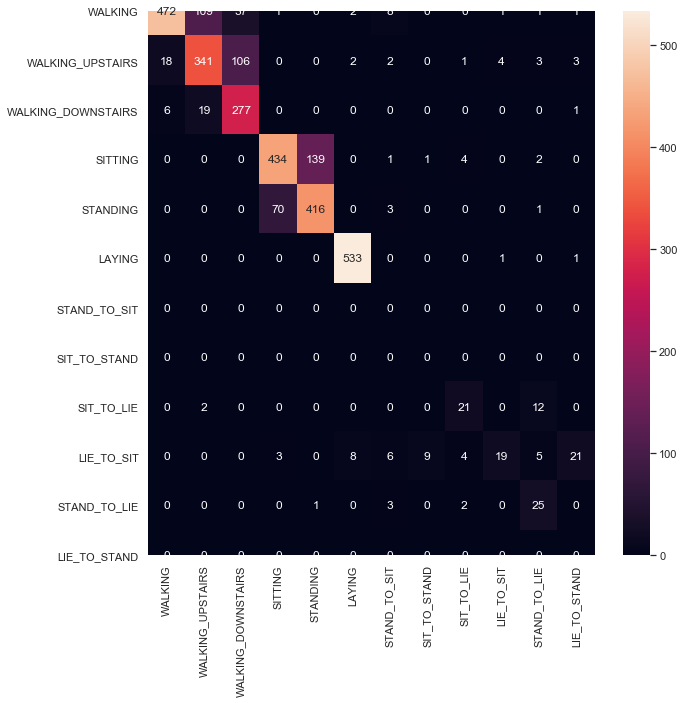

In [47]:

array = confusion_matrix(pred1,y_testing1)
#array = confusion_matrix(y_test1,pred1)

fig, ax = plt.subplots(figsize=(10,10))
sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING","STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING","STAND_TO_SIT","SIT_TO_STAND","SIT_TO_LIE","LIE_TO_SIT","STAND_TO_LIE","LIE_TO_STAND"),ax=ax,fmt='g')# font size
plt.show()

In [12]:
pred1

print(array)

[[472 109  37   1   0   2   8   0   0   1   1   1]
 [ 18 341 106   0   0   2   2   0   1   4   3   3]
 [  6  19 277   0   0   0   0   0   0   0   0   1]
 [  0   0   0 434 139   0   1   1   4   0   2   0]
 [  0   0   0  70 416   0   3   0   0   0   1   0]
 [  0   0   0   0   0 533   0   0   0   1   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0  21   0  12   0]
 [  0   0   0   3   0   8   6   9   4  19   5  21]
 [  0   0   0   0   1   0   3   0   2   0  25   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1440x1440 with 0 Axes>

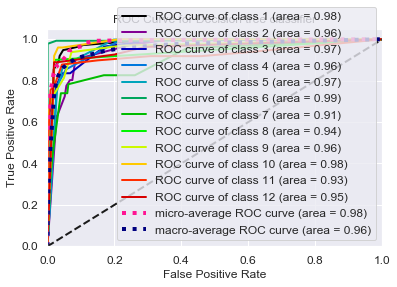

In [103]:
y_pred_prop = dt_clf.predict_proba(X_testing)
plt.figure(figsize=(20,20))
y_true = y_testing# ground truth labels
y_probas =y_pred_prop # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.title("ROC Curve for Decision tree classifier")
plt.show()

In [94]:
y_pred = dt_clf.predict(X_testing)
y_pred_prop = dt_clf.predict_proba(X_testing)
#predictions = [round(value) for value in y_pred_prop]
predictions=y_pred.copy()
pr_rec_f_supp=precision_recall_fscore_support(y_testing, predictions)
DF_report=pd.DataFrame({'Precision':list(pr_rec_f_supp[0]),
                        'Recall':list(pr_rec_f_supp[1]),
                        'F-Score':list(pr_rec_f_supp[2]),
                        'Support':list(pr_rec_f_supp[3])}, index=dickey)
DF_report
#model.fit(trainX, trainy)
# predict probabilities
#lr_probs = dt_clf.predict_proba(testX)
#plt.figure(figsize=(20,20))
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
# predict class values
#yhat = model.predict(testX)
#lr_precision, lr_recall, _ = precision_recall_curve(y_testing, y_pred_prop)
#plt.show()



C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Precision,Recall,F-Score,Support
1,0.746835,0.951613,0.836879,496
2,0.710417,0.723992,0.717140,471
3,0.914191,0.659524,0.766252,420
4,0.746988,0.854331,0.797062,508
5,0.848980,0.748201,0.795411,556
6,0.996262,0.977982,0.987037,545
7,0.000000,0.000000,0.000000,23
8,0.000000,0.000000,0.000000,10
9,0.600000,0.656250,0.626866,32
10,0.253333,0.760000,0.380000,25


## Classifier-2: K Nearest Neighbours Classifiers

0.8617963314358001
[0.86179633]
0.8548387096774194
[0.86179633 0.85483871]
0.8712839974699558
[0.86179633 0.85483871 0.871284  ]
0.8693864642631246
[0.86179633 0.85483871 0.871284   0.86938646]
0.875079063883618
[0.86179633 0.85483871 0.871284   0.86938646 0.87507906]
0.8722327640733712
[0.86179633 0.85483871 0.871284   0.86938646 0.87507906 0.87223276]
0.8769765970904491
[0.86179633 0.85483871 0.871284   0.86938646 0.87507906 0.87223276
 0.8769766 ]
Time to execute---Decision Tree Classifier---->> 241.4556586742401 seconds ---


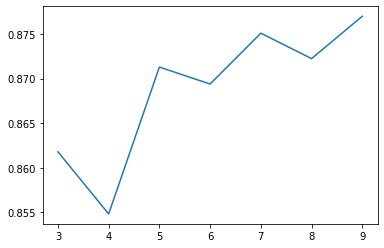

Optimal K value is 9
Accuracy of Optimum K value is 0.8769765970904491


In [11]:
fstart_time=time.time()
Accuracy_KNN = np.array([])
rangeli = list(range(3,10))
for i in rangeli:                            #iterating through different k values
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_training,y_ravel)
    predicted_knn = knn.predict(X_testing)
    Accuracy = accuracy_score(y_true = y_testing, y_pred = predicted_knn)
    Accuracy_KNN = np.append(Accuracy_KNN, Accuracy)
    print(Accuracy)
    print(Accuracy_KNN)
print("Time to execute---K NEarest Neighbours Classifier---->> %s seconds ---" % (time.time() - fstart_time))
plt.plot(rangeli, Accuracy_KNN)
plt.show()
print("Optimal K value is {}".format(rangeli[np.argmax(Accuracy_KNN)]))
print("Accuracy of Optimum K value is {}".format(np.max(Accuracy_KNN)))

C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1440x1440 with 0 Axes>

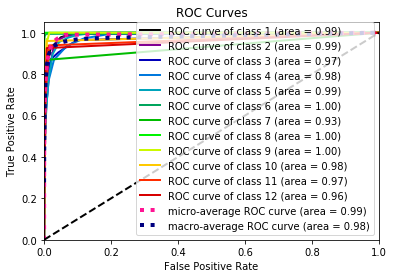

In [8]:
#now plot roc curve with optimum value 9 
knn = neighbors.KNeighborsClassifier(n_neighbors=9)
knn.fit(X_training,y_ravel)
y_pred_prop = knn.predict_proba(X_testing)
plt.figure(figsize=(20,20))
y_true = y_testing# ground truth labels
y_probas =y_pred_prop # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [9]:
y_pred = knn.predict(X_testing)
y_pred_prop = knn.predict_proba(X_testing)
#predictions = [round(value) for value in y_pred_prop]
predictions=y_pred.copy()
pr_rec_f_supp=precision_recall_fscore_support(y_testing, predictions)
DF_report=pd.DataFrame({'Precision':list(pr_rec_f_supp[0]),
                        'Recall':list(pr_rec_f_supp[1]),
                        'F-Score':list(pr_rec_f_supp[2]),
                        'Support':list(pr_rec_f_supp[3])}, index=dickey)
DF_report

,Precision,Recall,F-Score,Support
1,0.829016,0.967742,0.893023,496
2,0.863918,0.889597,0.876569,471
3,0.944767,0.773810,0.850785,420
4,0.905312,0.771654,0.833156,508
5,0.814417,0.955036,0.879139,556
6,0.996176,0.955963,0.975655,545
7,0.842105,0.695652,0.761905,23
8,0.909091,1.000000,0.952381,10
9,0.595238,0.781250,0.675676,32
10,0.689655,0.800000,0.740741,25


## Claasifier-3: Gaussian Naive Bayes Classifier

In [12]:
fstart_time=time.time()
mnb = GaussianNB()               #loading model
mnb.fit(X_training, y_ravel)              #fitting the model
predicted_mnb = mnb.predict(X_testing)
predicted_train = mnb.predict(X_training)
#Accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
Accuracy_test = accuracy_score(y_true = y_testing, y_pred = predicted_mnb)
Accuracy_train = accuracy_score(y_true = y_training, y_pred = predicted_train)
print("Time to execute---Gaussian Naive Bayes Classifier---->> %s seconds ---" % (time.time() - fstart_time))

print("Training Accuracy of Gaussian Naive Bayes:  {}".format(Accuracy_train))
print("Testing Accuracy of Gaussian Naive Bayes: {}".format(Accuracy_test))

yy = list(map(str, predicted_mnb))
y_testing1 = np.array(y_testing.T).ravel()
yy1 = list(map(str,y_testing1))
pred1 = np.array(pd.Series(yy).map(int,dickey))
y_testing1 = np.array(pd.Series(yy1).map(int,dickey))

array = confusion_matrix(pred1,y_testing1)
print(array)

Time to execute---Gaussian Naive Bayes Classifier---->> 1.227489709854126 seconds ---
Training Accuracy of Gaussian Naive Bayes:  0.7125016093729882
Testing Accuracy of Gaussian Naive Bayes: 0.717583807716635
[[383  11  41   0   0   0   0   0   0   0   0   0]
 [ 38 433  74   0   0   0   1   0   0   0   0   0]
 [ 75  18 305   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 457 527   0   0   0   0   0   1   0]
 [  0   0   0  17   1 530   0   0   0   0   0   0]
 [  0   8   0  31  26   0  17   7   0   0   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2   0   0   2   1  22   1  17   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   2   1   2   1  10   1  29   4]
 [  0   0   0   1   0  14   0   1   0  23   1  23]]


In [52]:

df_cm = pd.DataFrame(array, range(12),range(12))
print(df_cm)


      0    1    2    3    4    5   6  7   8   9  10  11
0   383   11   41    0    0    0   0  0   0   0   0   0
1    38  433   74    0    0    0   1  0   0   0   0   0
2    75   18  305    0    0    0   1  0   0   0   0   0
3     0    0    0    0    0    0   0  0   0   0   0   0
4     0    0    0  457  527    0   0  0   0   0   1   0
5     0    0    0   17    1  530   0  0   0   0   0   0
6     0    8    0   31   26    0  17  7   0   0   1   0
7     0    0    0    0    0    0   0  0   0   0   0   0
8     0    0    0    2    0    0   2  1  22   1  17   0
9     0    0    0    0    0    0   0  0   0   0   0   0
10    0    1    0    0    2    1   2  1  10   1  29   4
11    0    0    0    1    0   14   0  1   0  23   1  23


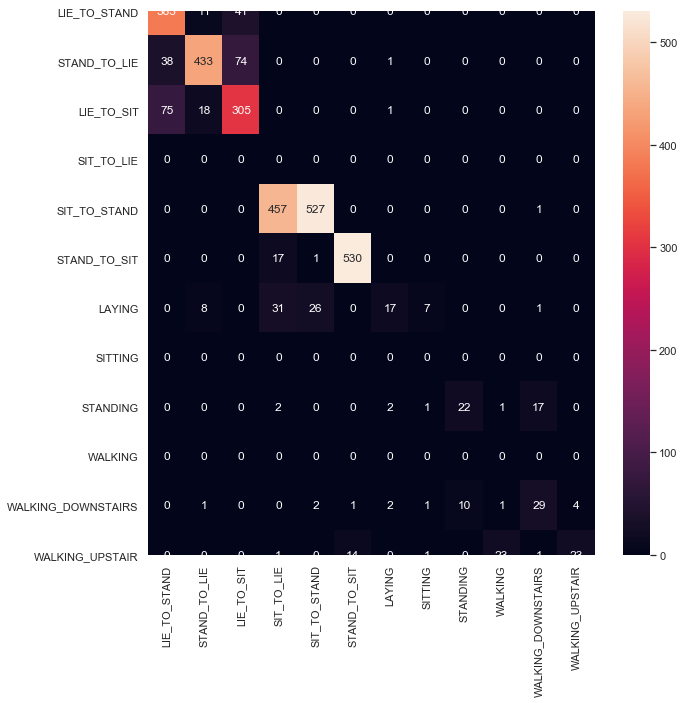

In [53]:
df_cm.columns = ["LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
df_cm.index =   ["LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"), xticklabels=("LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"),ax=ax,fmt='g')# font size
plt.show()

In [94]:
#df_cm.columns = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
#df_cm.index = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]

df_cm  #confusion matrix dataframe

,LIE_TO_STAND,STAND_TO_LIE,LIE_TO_SIT,SIT_TO_LIE,SIT_TO_STAND,STAND_TO_SIT,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIR
LIE_TO_STAND,383,11,41,0,0,0,0,0,0,0,0,0
STAND_TO_LIE,38,433,74,0,0,0,1,0,0,0,0,0
LIE_TO_SIT,75,18,305,0,0,0,1,0,0,0,0,0
SIT_TO_LIE,0,0,0,0,0,0,0,0,0,0,0,0
SIT_TO_STAND,0,0,0,457,527,0,0,0,0,0,1,0
STAND_TO_SIT,0,0,0,17,1,530,0,0,0,0,0,0
LAYING,0,8,0,31,26,0,17,7,0,0,1,0
SITTING,0,0,0,0,0,0,0,0,0,0,0,0
STANDING,0,0,0,2,0,0,2,1,22,1,17,0
WALKING,0,0,0,0,0,0,0,0,0,0,0,0


## Claasifier-4: Logistic Regression Classifier

In [13]:
fstart_time=time.time()
cli = [1,0.5,0.1,0.01,0.003,0.0003]
trainacc = np.array([])
testacc = np.array([])
fstart_time=time.time()
for j in cli:         #iterating through different penalty values
    LRmod = linear_model.LogisticRegression(penalty='l2', C=j)
    LRmod.fit(X_training,y_ravel)
    pred = LRmod.predict(X_testing)
    pred1 = LRmod.predict(X_training)
    testac = accuracy_score(y_true = y_testing, y_pred = pred)
    trainac = accuracy_score(y_true = y_training, y_pred = pred1)
    trainacc = np.append(trainacc,trainac)
    testacc = np.append(testacc,testac)
    print("Training Accuracy for penalty {}: {}".format(j,trainac))
    print("Testing Accuracy for penalty {}: {}".format(j,testac))

print("\n========================================================\n")
print("Time to execute---Logistics Regression Classifier---->> %s seconds ---" % (time.time() - fstart_time))

val = np.subtract(trainacc,testacc)    #finding the least difference between training and testing accuracy
print("Optimum Penalty value: {}".format(cli[np.argmin(val)]))
print("Maximum Testing Accuracy: {}".format(testacc[np.argmin(val)]))
print("Maximum Training Accuracy: {}".format(trainacc[np.argmin(val)]))

C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy for penalty 1: 0.9957512553109309
Testing Accuracy for penalty 1: 0.948134092346616


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy for penalty 0.5: 0.9945925067593665
Testing Accuracy for penalty 0.5: 0.9449715370018975


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy for penalty 0.1: 0.9911162611046737
Testing Accuracy for penalty 0.1: 0.9446552814674257


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy for penalty 0.01: 0.9805587743015322
Testing Accuracy for penalty 0.01: 0.941808981657179


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy for penalty 0.003: 0.970258787176516
Testing Accuracy for penalty 0.003: 0.9392789373814042
Training Accuracy for penalty 0.0003: 0.9192738509076863
Testing Accuracy for penalty 0.0003: 0.9048070841239721


Time to execute---Logistics Regression Classifier---->> 30.619640827178955 seconds ---
Optimum Penalty value: 0.0003
Maximum Testing Accuracy: 0.9048070841239721
Maximum Training Accuracy: 0.9192738509076863


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


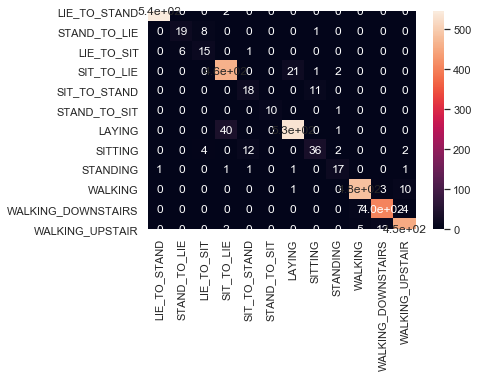

In [57]:
LRmod = linear_model.LogisticRegression(penalty='l2')
LRmod.fit(X_training,y_ravel)
pred = LRmod.predict(X_testing)
yy = list(map(str, pred))
y_testing1 = np.array(y_testing.T).ravel()
yy1 = list(map(str,y_testing1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_testing1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_testing1)
df_cm = pd.DataFrame(array, range(12),range(12))

df_cm.columns = ["LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
df_cm.index =   ["LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
fig, ax = plt.subplots(figsize=(10,10))
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"), xticklabels=("LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"),ax=ax,fmt='g')# font size

plt.show()

In [58]:
df_cm #confusion matrix plot

,LIE_TO_STAND,STAND_TO_LIE,LIE_TO_SIT,SIT_TO_LIE,SIT_TO_STAND,STAND_TO_SIT,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIR
LIE_TO_STAND,544,0,0,2,0,0,0,0,0,0,0,0
STAND_TO_LIE,0,19,8,0,0,0,0,1,0,0,0,0
LIE_TO_SIT,0,6,15,0,1,0,0,0,0,0,0,0
SIT_TO_LIE,0,0,0,463,0,0,21,1,2,0,0,0
SIT_TO_STAND,0,0,0,0,18,0,0,11,0,0,0,0
STAND_TO_SIT,0,0,0,0,0,10,0,0,1,0,0,0
LAYING,0,0,0,40,0,0,533,0,1,0,0,0
SITTING,0,0,4,0,12,0,0,36,2,0,0,2
STANDING,1,0,0,1,1,0,1,0,17,0,0,1
WALKING,0,0,0,0,0,0,1,0,0,484,3,10


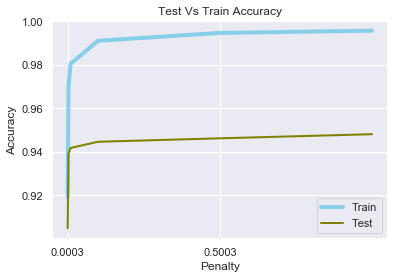

In [59]:
# multiple line plot
plt.plot( cli,trainacc , marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4, label='Train')
plt.plot( cli,testacc ,marker='', color='olive', linewidth=2, label='Test')
plt.xticks(np.arange(min(cli), max(cli), 0.5))
plt.title('Test Vs Train Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Penalty')
plt.legend()
plt.show()

## Classifier-5: Support Vector Machine Classifier

In [14]:
fstart_time=time.time()
clf = SVC()
clf.fit(X_training, y_training) 
predsvm = clf.predict(X_testing)
accuracy_score(y_true = y_testing, y_pred = predsvm)
predsvm = clf.predict(X_training)
print("Time to execute---Support Vector Machine Classifier---->> %s seconds ---" % (time.time() - fstart_time))

accuracy_score(y_true = y_training, y_pred = predsvm)


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Time to execute---Support Vector Machine Classifier---->> 32.9656457901001 seconds ---


## Claasifier-6: Neural Network  Classifier


In [24]:
fstart_time=time.time()
clf = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1,solver='adam')
sgd = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1, solver ='sgd',max_iter=500 )
clf.fit(X_training,y_ravel)
sgd.fit(X_training,y_ravel)

MLPClassifier(activation='relu', alpha=5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300, 6), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [23]:
pred = clf.predict(X_testing)
predt = clf.predict(X_training)
TeAccuracy = accuracy_score(y_true = y_testing, y_pred = pred)
TrAccuracy = accuracy_score(y_true = y_training, y_pred = predt)
print("Time to execute---Neural Network Classifier---->> %s seconds ---" % (time.time() - fstart_time))

print("Training Accuracy in Neural Network: {}".format(TrAccuracy))
print("Testing Accuracy in Neural Network: {}".format(TeAccuracy))

yy = list(map(str, pred))
y_testing1 = np.array(y_testing.T).ravel()
yy1 = list(map(str,y_testing1))
pred1 = np.array(pd.Series(yy).map(int,dickey))
y_testing1 = np.array(pd.Series(yy1).map(int,dickey))

array = confusion_matrix(pred1,y_testing1)
df_cm = pd.DataFrame(array, range(12),range(12))
fig, ax = plt.subplots(figsize=(5,5))
df_cm.columns = ["LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
df_cm.index =   ["LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"), xticklabels=("LIE_TO_STAND","STAND_TO_LIE","LIE_TO_SIT","SIT_TO_LIE","SIT_TO_STAND","STAND_TO_SIT","LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"),ax=ax,fmt='g')# font size
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 155 is different from 561)

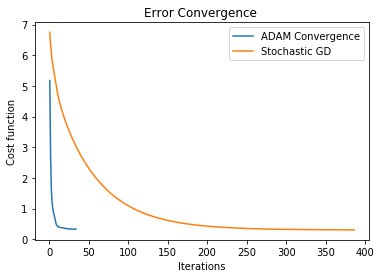

In [15]:
X1 = np.linspace(1, clf.n_iter_  , clf.n_iter_ )
X2 = np.linspace(1, sgd.n_iter_  , sgd.n_iter_ )

plt.plot(X1 , clf.loss_curve_ , label = 'ADAM Convergence' )
plt.plot(X2,sgd.loss_curve_,label = "Stochastic GD")
plt.title('Error Convergence ')
plt.ylabel('Cost function')
plt.xlabel('Iterations')
plt.legend()
plt.show()

In [16]:
df_cm  #confusion matrix table

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIR
LAYING,531,4,0,0,0,0
SITTING,0,467,70,0,0,0
STANDING,6,19,462,0,0,0
WALKING,0,0,0,487,3,4
WALKING_DOWNSTAIRS,0,0,0,7,399,1
WALKING_UPSTAIR,0,1,0,2,18,466


## Step 4: PCA Analysis

## PCA - Principle Component Analysis

In [96]:
#trainX = pd.read_table("C:\\Users\\test\\Downloads\\DPA Unit\\Final_Assignment\\Datasets\\Dataset1 HAPT\\Train\\X_train.txt", delim_whitespace=True,header=None)
#trainy = pd.read_table("C:\\Users\\test\\Downloads\\DPA Unit\\Final_Assignment\\Datasets\\Dataset1 HAPT\\Train\\y_train.txt",delim_whitespace=True,header=None)
#testX = pd.read_csv("C:\\Users\\test\\Downloads\\DPA Unit\\Final_Assignment\\Datasets\\Dataset1 HAPT\\Test\\X_test.txt",delim_whitespace=True,header=None)
#testy = pd.read_csv("C:\\Users\\test\\Downloads\\DPA Unit\\Final_Assignment\\Datasets\\Dataset1 HAPT\\Test\\y_test.txt",delim_whitespace=True,header=None)
one = [training_X,testing_X]
two = [training_y,testing_y]
X_df = pd.concat(one)
y_df = pd.concat(two)

### PCA functions to help calculate PCA analysis

In [97]:
def fetaure_norm(X):
    mu = X.mean(axis=0)
    stdv = X.std(axis = 0)

    X_norm = (X - mu)/stdv
    return X_norm

def pca(X):
    m,n = X.shape
    
    sigma = (1/m) * X.T * X
    a, b = np.linalg.eig(sigma)
    
    sort = a.argsort()[::-1]
    eigVal = a[sort]
    eigVec = b[:,sort]
    
    return eigVal,eigVec

def reduced_data(X, U, k):
    U_reduce = U[:,:k]
    Z = U_reduce.T * X.T
    return Z

def recover_data(Z,U,K):
    X_rec = Z.T * U[:,:k].T
    return X_rec

def variance_cal(S,k,m):
    total1 = 0
    total2 = 0
    for i in range(1,k):
        total1 = total1 + S[i]
    
    for j in range(1,m):
        total2 = total2 + S[j]
        
    variance = total1/total2
    return variance

In [98]:

X = np.asmatrix(X_df)
y = np.asmatrix(y_df)

X_norm = fetaure_norm(X)
m,n = X_norm.shape
a,b = pca(X_norm)
tes = np.array([])
li = list(range(10,250))
for k in li:
    Z = reduced_data(X_norm,b,k)
    X_recov = recover_data(Z,b,k)
    test1 = variance_cal(a,k,n)
    tes = np.append(tes,test1)
    #print("Variance covered with {} features: {}%".format(k,test1*100))
#print("Time to execute---Neural Network Classifier---->> %s seconds ---" % (time.time() - fstart_time))


KeyboardInterrupt: 

C:\Users\gokul\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


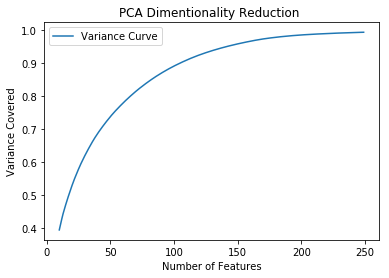

In [19]:
plt.plot(li,tes, label = 'Variance Curve')
plt.title('PCA Dimentionality Reduction ')
plt.ylabel('Variance Covered')
plt.xlabel('Number of Features')
plt.legend()
plt.show()

# Step 5: Feature selection

## Classifier Used:Extra Tree based feature selection

In [17]:
# Extra Tree based feature selection
tree_clf = ExtraTreesClassifier()
tree_clf = tree_clf.fit(X_training, y_ravel)
model = SelectFromModel(tree_clf, prefit=True)
nf_tree_features_Train= X_training.loc[:, model.get_support()]
nf_tree_features_Test = X_testing.loc[:, model.get_support()]
print(nf_tree_features_Train.shape)
print(nf_tree_features_Test.shape)


(7767, 155)
(3162, 155)


In [12]:
#X_train_new = model.transform(X_train)
#X_test_new = model.transform(X_test)
print(X_testing.shape)
#print(X_test_new.shape)
#model.predict()
#model.fit(X_train_new, y_train)
y_pred = tree_clf.predict(X_testing)
y_pred_prop = tree_clf.predict_proba(X_testing)
#predictions = [round(value) for value in y_pred_prop]
predictions=y_pred.copy()
# Confusion matrix
#conf= confusion_matrix(y_test, predictions)
#Labels=list(dataset.Activity.unique())


(3162, 561)


In [14]:
pr_rec_f_supp=precision_recall_fscore_support(y_testing, predictions)
DF_report=pd.DataFrame({'Precision':list(pr_rec_f_supp[0]),
                        'Recall':list(pr_rec_f_supp[1]),
                        'F-Score':list(pr_rec_f_supp[2]),
                        'Support':list(pr_rec_f_supp[3])}, index=dickey)
DF_report

,Precision,Recall,F-Score,Support
1,0.945122,0.937500,0.941296,496
2,0.906883,0.951168,0.928497,471
3,0.904412,0.878571,0.891304,420
4,0.886406,0.937008,0.911005,508
5,0.944972,0.895683,0.919668,556
6,0.994516,0.998165,0.996337,545
7,0.695652,0.695652,0.695652,23
8,0.888889,0.800000,0.842105,10
9,0.600000,0.750000,0.666667,32
10,0.666667,0.640000,0.653061,25


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1440x1440 with 0 Axes>

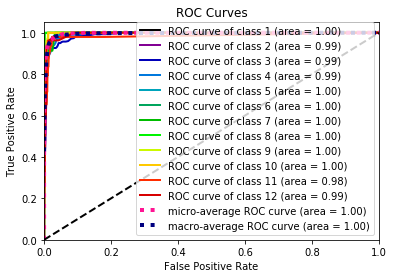

In [17]:
plt.figure(figsize=(20,20))
y_true = y_testing# ground truth labels
y_probas =y_pred_prop # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()

In [19]:
# Train Score after Extra Tree Classifier

fstart_time=time.time()
algo = []
scores = []
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    #SVC(kernel="linear"),
    SVC(),
    GaussianNB(),
    LogisticRegression(),
    MLPClassifier()
    ]

for clf in classifiers:
    algo.append(clf.__class__.__name__)
    scores.append(cross_val_score(clf,nf_tree_features_Train,y_ravel, cv=5).mean())
    print("Time to execute---After Extra Tree Feature selection training Accuracy---->> %s seconds ---" % (time.time() - fstart_time))

Extra_Train_score_df = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')

Extra_Train_score_df


Time to execute---After Extra Tree Feature selection training Accuracy---->> 5.292876958847046 seconds ---
Time to execute---After Extra Tree Feature selection training Accuracy---->> 31.923659801483154 seconds ---
Time to execute---After Extra Tree Feature selection training Accuracy---->> 45.39177489280701 seconds ---
Time to execute---After Extra Tree Feature selection training Accuracy---->> 55.32110810279846 seconds ---
Time to execute---After Extra Tree Feature selection training Accuracy---->> 55.787373304367065 seconds ---


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

Time to execute---After Extra Tree Feature selection training Accuracy---->> 65.29914474487305 seconds ---


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimizati

Time to execute---After Extra Tree Feature selection training Accuracy---->> 165.36371493339539 seconds ---


,Score
Algorithm,
DecisionTreeClassifier,0.823873
RandomForestClassifier,0.897132
KNeighborsClassifier,0.883870
SVC,0.918893
GaussianNB,0.811508
LogisticRegression,0.917608
MLPClassifier,0.912973


In [20]:
# Test Score after Extra Tree Classifier
fstart_time=time.time()
algo = []
scores = []
bscores = []

for clf in classifiers:
    clf = clf.fit(nf_tree_features_Train , y_ravel)
    y_pred = clf.predict(nf_tree_features_Test)
    algo.append(clf.__class__.__name__)
    scores.append(accuracy_score(y_pred, y_testing))
    bscores.append(balanced_accuracy_score(y_testing, y_pred))
    print("Time to execute---After Extra Tree Feature selection testing Accuracy---->> %s seconds ---" % (time.time() - fstart_time))

Extra_Test_score_df = pd.DataFrame({'Algorithm': algo, 'Accuracy Score': scores, 'Balanced Score': bscores}).set_index('Algorithm')
Extra_Test_score_df


Time to execute---After Extra Tree Feature selection testing Accuracy---->> 1.5936877727508545 seconds ---
Time to execute---After Extra Tree Feature selection testing Accuracy---->> 9.593480587005615 seconds ---
Time to execute---After Extra Tree Feature selection testing Accuracy---->> 16.08411431312561 seconds ---
Time to execute---After Extra Tree Feature selection testing Accuracy---->> 19.160913228988647 seconds ---
Time to execute---After Extra Tree Feature selection testing Accuracy---->> 19.290484189987183 seconds ---


C:\ProgramData\Anaconda3\envs\bul7cv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Time to execute---After Extra Tree Feature selection testing Accuracy---->> 21.234771728515625 seconds ---
Time to execute---After Extra Tree Feature selection testing Accuracy---->> 45.84371042251587 seconds ---


,Accuracy Score,Balanced Score
Algorithm,,
DecisionTreeClassifier,0.796648,0.693508
RandomForestClassifier,0.898166,0.768693
KNeighborsClassifier,0.894371,0.794601
SVC,0.932954,0.815634
GaussianNB,0.733080,0.659172
LogisticRegression,0.940228,0.858549
MLPClassifier,0.939911,0.854624
